In [1]:
library(fpp3)

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──
✔ tibble      3.1.0     ✔ tsibble     1.0.0
✔ dplyr       1.0.5     ✔ tsibbledata 0.2.0
✔ tidyr       1.1.3     ✔ feasts      0.1.7
✔ lubridate   1.7.4     ✔ fable       0.3.0
✔ ggplot2     3.3.3     
── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()       masks base::date()
✖ dplyr::filter()         masks stats::filter()
✖ tsibble::intersect()    masks base::intersect()
✖ tsibble::interval()     masks lubridate::interval()
✖ dplyr::lag()            masks stats::lag()
✖ tsibble::new_interval() masks lubridate::new_interval()
✖ tsibble::setdiff()      masks base::setdiff()
✖ tsibble::union()        masks base::union()


In [9]:
google_2015 <- gafa_stock %>%
    filter(Symbol == "GOOG") %>%
    mutate(Day = row_number()) %>%
    update_tsibble(index = Day)

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”

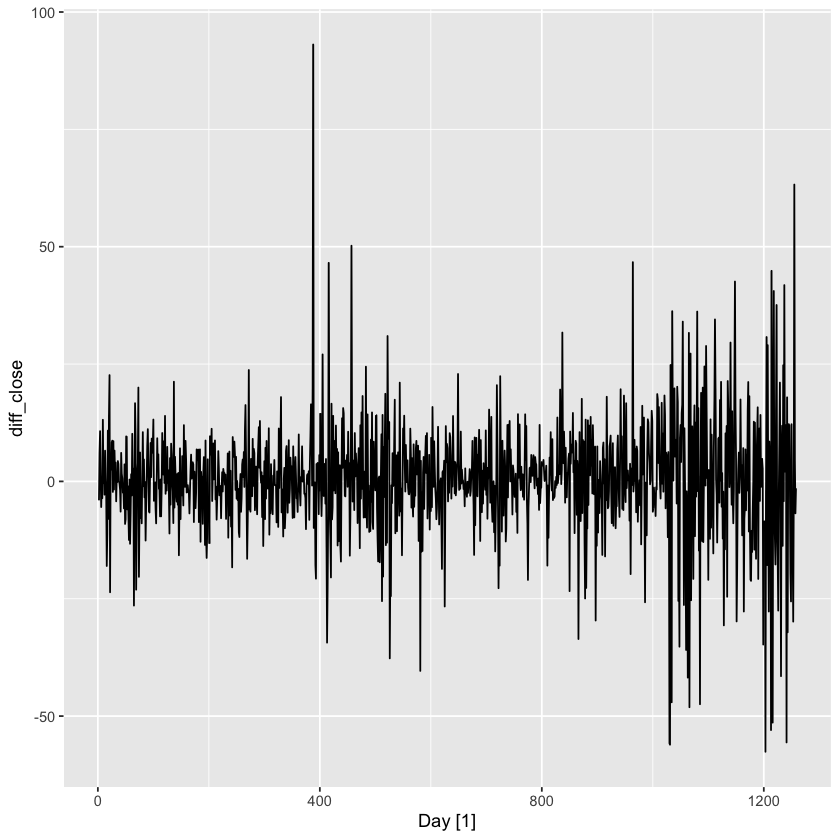

In [20]:
google_2015 %>%
    mutate(diff_close = difference(Close)) %>%
    autoplot(diff_close)

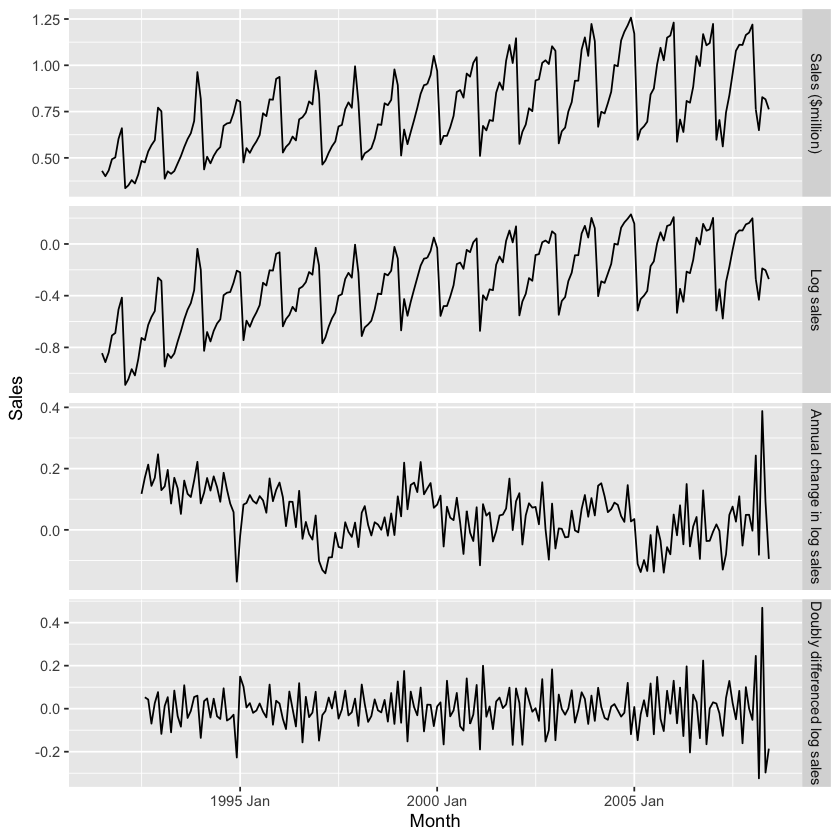

In [24]:
PBS %>%
    filter(ATC2 == "H02") %>%
    summarise(Cost = sum(Cost)/1e6) %>%
    transmute(
        `Sales ($million)` = Cost,
        `Log sales` = log(Cost),
        `Annual change in log sales` = difference(log(Cost), 12),
        `Doubly differenced log sales` = difference(difference(log(Cost), 12)),
    ) %>%
    pivot_longer(-Month, names_to="Type", values_to="Sales") %>%
    mutate(
        Type = factor(Type, levels = c(
          "Sales ($million)",
          "Log sales",
          "Annual change in log sales",
          "Doubly differenced log sales"))
    ) %>%
    ggplot(aes(Month, Sales)) +
    geom_line() +
    facet_grid(vars(Type), scales = "free_y")